# 1. Import the library

In [1]:
import AutoProfLib_DEF as APL

# 2. Initialize the AutoProfLib

## 2.1 Prepare the input

In [2]:
#Paths: list of strings or string containing the paths or the path to the directory 
#where the regular and the frequency calculations outputs are stored. 
#The program assumes that exists a folder inside the paths provided by the user named
#FREQ or ../Freq (thus, the frequency directories are outside the work_directory and 
#its name is Freq), in which the frequency calculations are stored
path_to_surf_intermediates = ["Geom",
                             "../H/Geom/",
                "../CH3CHOHCH3/Geom/", 
                "../CH3COHCH3/Geom/",
                   "../CH3CHOCH3/Geom/",
                   "../CH3COCH3/Geom/",
                  "../CH3COCH3/Geom/"]

path_to_gas = ["../../Gas_phase/iPrOH/Geom", 
                   "../../Gas_phase/H2/Geom", 
                   "../../Gas_phase/CH3COCH3/Geom"]
path_to_ts = ["../TS_CH/Geom", 
                  "../TS_OH/Geom",
                 "../TS_CH_OH/Geom", 
                  "../TS_OH_CH/Geom"]

In [3]:
#Geometries, frequency treatment, spin, atoms added, PBC instructions 
#and reference instructions.

#list of strings or None string containing the geometry of the molecules or molecule 
#stored in the paths. 
#It is only relevant for gas phase molecules (see Gibbs method).
surf_geometry = None
gas_geometry = ["nonlinear", "linear", "nonlinear"]
#list containing the frequencies process options (see Gibbs and Helmholtz methods
#in the AutoProfLib user guide for further information).
#The elements of the list should be:
#0.	Process option flag: string. The accepted keys are Erase, Substitute 
#(default option) and Grimme.
#1.	Minimum frequency threshold: float indicating the minimum threshold from 
#which the Erase or the Substitute options will be applied.
#2.	Application of the extra Grimme option on the rotational entropy: True to activate
#it, False otherwise. 
#This flag will only make some effect if the first element of max_freq list is Grimme
frequency_pre_process = ["Erase", None, False]
#spin: list of int or int with the spin of the molecule. 
#This variable is only important for gas phase molecules (see Gibbs method in
#the User's guide).
spin = 0
#Wrapp-up all the information in a list
surf_phase = [path_to_surf_intermediates, 
                  surf_geometry, frequency_pre_process, spin]
gas_phase = [path_to_gas, gas_geometry, frequency_pre_process, spin]

TSS = [path_to_ts, surf_geometry, frequency_pre_process, spin]
#add_atom: list of lists containing the information to add an atom to specific 
#coordinates. This utility is used to avoid problems related to mass conservation, 
#which affects to the mechanism.
#The items of the list are:
#0.	List containing two items list (int) for each atom added. 
#The first item of the list indicates the phase in which the atom will be added 
#(0: adsorbed intermediates, 1: gas phase, and 2: TSs). 
#The second item indicates the index of the specie or state in which the new atom 
#will be added.
#1.	List containing four items list for each atom to be added. 
#The first element is the label of the atom (string), and the other 3 are the 
#corresponding x, y, and z coordinates of the atom.

add_atom =  [   [[0,1], [0,3], [0,4], [0,5], [0,5], [2, 2], [2, 3] ],  
                 [ ["H",5.598002346788653,5.2364688867555407,12.62224206687647],
                  ["H",5.598002346788653,5.2364688867555407,12.62224206687647] ,
                ["H",5.598002346788653,5.2364688867555407,12.62224206687647],
                ["H",5.598002346788653,5.2364688867555407,12.62224206687647],
                ["H",5.598002346788653,5.2364688867555407,12.62224206687647],
                ["H",12.598002346788653,5.2364688867555407,12.62224206687647],
                ["H",12.598002346788653,5.2364688867555407,12.62224206687647] ] ]
#use_pbc: list that sets the control to use the PBC in the PreProcessor class. 
#The items of the use_pbc list are:
#0.	A bool. If is set as True, the PBC are applied.
#1.	This item indicates to the program the structures in which the PBC will not 
#be applied. A list of lists (like the first item in add_atom input), 
#where each element is a list (int) containing two items. 
#The usage and the interpretation are the same than in the first element of the 
#add_atom input.
#2.	The max_pbc threshold defined in the PreProcessor inputs
use_pbc = [True, [[0, 5], [0, 6], [2,0],[2,1], [2,2]], 0.68]
#reference: list containing the flags to reference the energy profile according to the user indications. The reference items are:
#0.	The label of the surface state.
#1.	The total number of surfaces that will be used.
#2.	The gas phase reactive label.
#3.	The gas phase product label.
#4.	The supplementary adsorbed surface and gas phase list. 
#This list is used if an adsorbed intermediate (for instance, H*) is taken 
#into account in the reference. The first item is a bool, True if this list 
#should have effect (False otherwise), the second one is the label of the adsorbed 
#specie that will be taken into account in the reference, the third one is a bool 
#that indicates if this specie is a reactant (e.g in a hydrogenation example; then, 
#this item should be True) or a product (e.g in a dehydrogenation example; then, 
#this item should be False), and the fourth one is the label of the 
#gas phase specie (e.g H2(g)).

ref = ["Co", 3, "CH3CHOHCH3(g)", 'CH3COCH3(g)', [True, "2H", False, 1, "H2(g)"]]


In [4]:
#Class initialization. T_P are the initial Temperature and Pressure conditions
ADA = APL.AutoProfLib(surf_phase, gas_phase, TSS,add_atom, use_pbc,ref,T_P 
                      = [418, 1.013E5]) 

/home/asabadell/Total/Test/ToKamila/ADA/Microkinetic_database/Co_0001_iPrOH/Slab/AutoProfLib_DEF.py:935: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.coords_list = np.asarray([self.get_coord_dict(i)[1] for i in Raw_Data])
/home/asabadell/Total/Test/ToKamila/ADA/Microkinetic_database/Co_0001_iPrOH/Slab/AutoProfLib_DEF.py:945: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.coords_list_gas = np.asarray([self.get_coord_dict(i)[1] for i in Raw_Data_gas])
/home/asabadell/Total/Test/ToKamila/ADA/Microkinetic_database/Co_0001_iPrOH/Slab/AutoProfLib

# 3. Generate the mechanism

{'Empty': 1, 'C': '', 'O': '', 'H': '', 'Label': 'Co'}
{'Empty': '', 'C': '', 'O': '', 'H': [2, 2], 'Label': '2H'}
{'Empty': '', 'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3], 'O': ['C', 'H', 0, 1], 'H': ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'O', 0, 8], 'Label': 'CH3CHOHCH3'}
{'Empty': '', 'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3], 'O': ['C', 'H', 0, 1], 'H': ['C', 'C', 'C', 'C', 'C', 'C', 'O', 1, 8], 'Label': 'CH3COHCH3'}
{'Empty': '', 'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3], 'O': ['C', 0, 1], 'H': ['C', 'C', 'C', 'C', 'C', 'C', 'C', 1, 8], 'Label': 'CH3CHOCH3'}
{'Empty': '', 'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3], 'O': ['C', 0, 1], 'H': ['C', 'C', 'C', 'C', 'C', 'C', 2, 8], 'Label': 'CH3COCH3_2H'}
{'Empty': '', 'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3], 'O': ['C', 0, 1], 'H': ['C', 'C', 'C', 'C', 'C', 'C', 0, 6], 'Label': 'CH3COCH3'}
{'Empty': '', 'O':

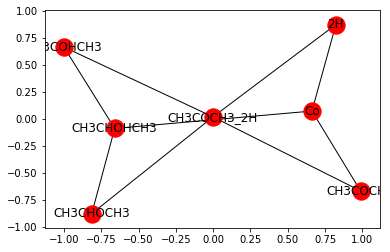

In [5]:
#Labels for the mechanism and the stoichiometric matrix
Labels =["Co", "2H", "CH3CHOHCH3", "CH3COHCH3", "CH3CHOCH3", "CH3COCH3_2H", 
        "CH3COCH3"]
gas_Labels = ["CH3CHOHCH3(g)", "H2(g)", "CH3COCH3(g)"]

TS_Labels = ["CH", "OH", "CH-OH", "OH-CH"]


#Print the obtained connectivity dictionaries
Labeled_dicts = ADA.get_labeled_dicts(Labels)
for i in Labeled_dicts:
    print(i)
for j in ADA.gas_conn_dicts:
    print(j)
for k in ADA.TSs_conn_dicts:
    print(k)

#Generate the system adjacency matrix
m = ADA.system_adjacency_matrix()
#Generate the mechanism graph using the system adjacency matrix and the 
gr = ADA.make_mol_graphs(m, Labels)
#Draw the mechanism as a graph
ADA.show_graph_with_labels(m, Labels, "./COOH_graph.png")

# 4. Generate the stoichiometric matrix

In [6]:
#Generate the stoichiometric matrix generates the stoichiometric matrix 
#(as a pandas Data Frame) and the following files: the rm.mkm, 
#the human_readeable_reactions.txt and the Stoich_mat.csv

#The user should provide the gas phase molecules, and the TS Labels, together
#with a list containing the labels of the graph nodes (intermediates) to generate
#the graph analysis. That is: find the different branches of the mechanism that leads
#from the first node ("Pd" in this case) to the last intemediate ("CH3COCH3 in this
#case")
stoich_mat = ADA.get_stoich_mat(Labels, gas_Labels, TS_Labels, [Labels[0], Labels[-1]])

In [7]:
stoich_mat

,R1,R2,R3,R4,R5,R6,R7,R8,R9
i0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
i1,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
i2,0.0,1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0
i3,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0
i4,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
i5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,-1.0
i6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
CH3CHOHCH3(g),0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H2(g),-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CH3COCH3(g),0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0


# 5. Generate the energetic pathway

Frequency list saved on Geom/freq.txt
Energy summary at T = 418.00 K
Potential energy: -248.94431245 eV
ZPE correction: 0.6622325335000001 eV
Total Cv: 1.3648745797324187 eV/K
U: -246.91720533676758 eV
S: 0.006903680714148645 eV/K
F: -249.80294387528173 eV
Energy summary saved at Geom/energy_summary_None.txt
Frequency list saved on ../H/Geom/freq.txt
Energy summary at T = 418.00 K
Potential energy: -252.87886573 eV
ZPE correction: 0.8495343675000001 eV
Total Cv: 1.3726422435281795 eV/K
U: -250.6566891189718 eV
S: 0.006848503576165825 eV/K
F: -253.5193636138091 eV
Energy summary saved at ../H/Geom/energy_summary_None.txt
Frequency list saved on ../CH3CHOHCH3/Geom/freq.txt
Energy summary at T = 418.00 K
Potential energy: -313.37288714 eV
ZPE correction: 3.5368572134999994 eV
Total Cv: 1.7030891220143198 eV/K
U: -308.13294080448566 eV
S: 0.008673697630635848 eV/K
F: -311.7585464140914 eV
Energy summary saved at ../CH3CHOHCH3/Geom/energy_summary_None.txt
Frequency list saved on ../CH3COHCH

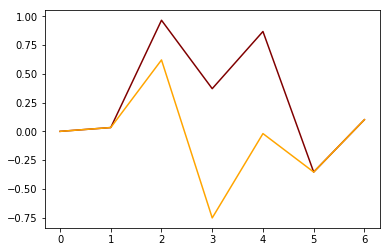

In [8]:
#Generate the energy profile and gather the energies of the gas phase, the surface,
#and the TS, and wrap all the energy information in the energy_dict free (Gibbs for
#gas phase, Helmholtz for adsorbed species), the energy_dict_h (Enthalpy for gas,
#internal energy for adsorbed intermediates) and energy_dict_s (entropies). Finally,
#the energy paths found by the programm are also returned (paths_energy).

#The energy is saved in the Output_energy and Output_energy_ref (automatic) files.
Output_energy = "g.mkm"
Res = ADA.export_energies(Output_energy)
gas,surface,tss,energy_dict_free,energy_dict_h,energy_dict_s,paths_energy = Res

In [9]:
tss

{'A_ts': [-310.82625863222694,
  -311.1711410066535,
  -307.20751169426103,
  -308.09466665579777],
 'U_ts': [-307.2734301555238,
  -307.5970284920816,
  -306.932327921883,
  -307.8280920443102],
 'S_ts': [0.008499589657184515,
  0.008550508408066704,
  0.008263862684157524,
  0.008243266605472054],
 'Ep_ts': [-312.31885523, -312.63629932, -308.41598287, -309.36956806]}

In [10]:
surface

{'A': [-249.80294387528173,
  -253.51936361380908,
  -311.7585464140914,
  -307.70429227320244,
  -308.82734781843004,
  -304.7122228416214,
  -304.7122228416214],
 'U': [-246.91720533676758,
  -250.6566891189718,
  -308.13294080448566,
  -304.17646070290454,
  -305.34019994026715,
  -301.3052506471954,
  -301.3052506471954],
 'S_a': [0.006903680714148645,
  0.006848503576165825,
  0.008673697630635848,
  0.008439788445688802,
  0.008342459038667198,
  0.008150651182837308,
  0.008150651182837308],
 'Ep_s': [-248.94431245,
  -252.87886573,
  -313.37288714,
  -309.05178857,
  -310.26064977,
  -305.85728866,
  -305.85728866]}

In [11]:
gas

{'G': [-61.98882026445924, -6.965931334086632, -55.01071611034123],
 'H': [-60.53919692334373, -6.358221659199546, -53.5671745968339],
 'S_g': [0.0034679984237213123, 0.0014538508968590558, 0.0034534485969074835],
 'ElE_g': [-63.70206215, -6.75130747, -56.06400343]}

In [12]:
energy_dict_free


{'Co': -249.80294387528173,
 '2H': -253.51936361380908,
 'CH3CHOHCH3': -311.7585464140914,
 'CH3COHCH3': -307.70429227320244,
 'CH3CHOCH3': -308.82734781843004,
 'CH3COCH3_2H': -304.7122228416214,
 'CH3COCH3': -304.7122228416214,
 'TSCH3CHOHCH3,CH3COHCH3': -310.82625863222694,
 'TSCH3CHOHCH3,CH3CHOCH3': -311.1711410066535,
 'TSCH3COHCH3,CH3COCH3_2H': -307.20751169426103,
 'TSCH3CHOCH3,CH3COCH3_2H': -308.09466665579777,
 'CH3CHOHCH3(g)': -61.98882026445924,
 'H2(g)': -6.965931334086632,
 'CH3COCH3(g)': -55.01071611034123}

In [13]:
energy_dict_s

{'Co': 0.006903680714148645,
 '2H': 0.006848503576165825,
 'CH3CHOHCH3': 0.008673697630635848,
 'CH3COHCH3': 0.008439788445688802,
 'CH3CHOCH3': 0.008342459038667198,
 'CH3COCH3_2H': 0.008150651182837308,
 'CH3COCH3': 0.008150651182837308,
 'TSCH3CHOHCH3,CH3COHCH3': 0.008499589657184515,
 'TSCH3CHOHCH3,CH3CHOCH3': 0.008550508408066704,
 'TSCH3COHCH3,CH3COCH3_2H': 0.008263862684157524,
 'TSCH3CHOCH3,CH3COCH3_2H': 0.008243266605472054,
 'CH3CHOHCH3(g)': 0.0034679984237213123,
 'H2(g)': 0.0014538508968590558,
 'CH3COCH3(g)': 0.0034534485969074835}

In [14]:
paths_energy

[{'Co': 0.0,
  'CH3CHOHCH3': 0.03321772564953562,
  'TSCH3CHOHCH3,CH3COHCH3': 0.9655055075140808,
  'CH3COHCH3': 0.3710521280112289,
  'TSCH3COHCH3,CH3COCH3_2H': 0.8678327069526404,
  'CH3COCH3_2H': -0.35329817893500604,
  'CH3COCH3': 0.10143714400157933},
 {'Co': 0.0,
  'CH3CHOHCH3': 0.03321772564953562,
  'TSCH3CHOHCH3,CH3CHOCH3': 0.620623133087463,
  'CH3CHOCH3': -0.752003417216315,
  'TSCH3CHOCH3,CH3COCH3_2H': -0.01932225458403991,
  'CH3COCH3_2H': -0.35329817893500604,
  'CH3COCH3': 0.10143714400157933}]

In [15]:
ADA.dict_complete

{'Co': {'Empty': 1, 'O': '', 'H': '', 'C': ''},
 '2H': {'Empty': '', 'O': '', 'H': [2, 2], 'C': ''},
 'CH3CHOHCH3': {'Empty': '',
  'O': ['C', 'H', 0, 1],
  'H': ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'O', 0, 8],
  'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3]},
 'CH3COHCH3': {'Empty': '',
  'O': ['C', 'H', 0, 1],
  'H': ['C', 'C', 'C', 'C', 'C', 'C', 'O', 1, 8],
  'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3]},
 'CH3CHOCH3': {'Empty': '',
  'O': ['C', 0, 1],
  'H': ['C', 'C', 'C', 'C', 'C', 'C', 'C', 1, 8],
  'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3]},
 'CH3COCH3_2H': {'Empty': '',
  'O': ['C', 0, 1],
  'H': ['C', 'C', 'C', 'C', 'C', 'C', 2, 8],
  'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3]},
 'CH3COCH3': {'Empty': '',
  'O': ['C', 0, 1],
  'H': ['C', 'C', 'C', 'C', 'C', 'C', 0, 6],
  'C': ['C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 0, 3]},
 'CH3CHOHCH3(g)': {'Empty': '',
  'O'

In [16]:
#Generate the input for generating the OpenFOAM Mechanism
Path_to_human_readeable_reactions = "Human_readable_reactions.txt"
ADA.OpenFOAM_mechanism(Path_to_human_readeable_reactions)

[['2Co+H2(g)', '->', '2H'],
 ['Co+CH3CHOHCH3(g)', '->', 'CH3CHOHCH3'],
 ['CH3CHOHCH3+Co', '->', 'CH3COHCH3+1H'],
 ['CH3CHOHCH3+Co', '->', 'CH3CHOCH3+1H'],
 ['2H+CH3COCH3(g)', '->', 'CH3COCH3_2H'],
 ['CH3COHCH3+Co', '->', 'CH3COCH3_2H+1H'],
 ['CH3CHOCH3+Co', '->', 'CH3COCH3_2H+1H'],
 ['CH3COCH3', '->', 'Co+CH3COCH3(g)'],
 ['CH3COCH3_2H', '->', 'CH3COCH3+H2(g)']]

In [17]:
ADA.graph_paths

[['Co',
  'CH3CHOHCH3',
  'TSCH3CHOHCH3,CH3COHCH3',
  'CH3COHCH3',
  'TSCH3COHCH3,CH3COCH3_2H',
  'CH3COCH3_2H',
  'CH3COCH3'],
 ['Co',
  'CH3CHOHCH3',
  'TSCH3CHOHCH3,CH3CHOCH3',
  'CH3CHOCH3',
  'TSCH3CHOCH3,CH3COCH3_2H',
  'CH3COCH3_2H',
  'CH3COCH3']]